##  Malaria Diagnosis
-  Task
- Data    (From Tensorflow datasets)
- Modelling (CNN)
- Error Sanctioning
- Training and Optimization
- Performance   Measurement
- Validation and testing
- Corrective measures

### Task
 we have a segment of cell we have to tell whether it is parasitized or unparasitized

## Dataset Preparation

In [32]:
### Importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.src.ops import dtype
from pandas.io.sas.sas_constants import dataset_length
from tensorflow_datasets.core import dataset_info
from tensorflow.keras.layers  import Conv2D, MaxPool2D,Dense,Flatten,FlaxLayer
from tensorflow.keras.layers import InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy

In [33]:
ds,ds_info=tfds.load('malaria',with_info=True,as_supervised=True, shuffle_files=True,split=['train'])
print(ds)
print(ds_info)

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]
tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\wajah\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{raja

In [34]:
for data in ds[0].take(1):
    print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [35]:
Train_Ratio=0.8
Val_Ratio=0.1
Test_Ratio=0.1
dataset=tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
dataset_length=len(dataset)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


In [36]:
train_dataset=dataset.take(int(Train_Ratio*dataset_length))
# print(train_dataset)
print(list(train_dataset.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


In [37]:
val_test_dataset=dataset.skip(int(Train_Ratio*dataset_length))
print(list(val_test_dataset.as_numpy_iterator()))
val_dataset=val_test_dataset.take(int(Val_Ratio*dataset_length))
print(list(val_dataset.as_numpy_iterator()))

[np.int64(8), np.int64(9)]
[np.int64(8)]


In [38]:
test_dataset=val_test_dataset.skip(int(Val_Ratio*dataset_length))
print(list(test_dataset.as_numpy_iterator()))

[np.int64(9)]


In [39]:
def splits(dataset,Train_Ratio,Val_Ratio,Test_Ratio):

    dataset_length=len(dataset)

    train_dataset=dataset.take(int(Train_Ratio*dataset_length))

    val_test_dataset=dataset.skip(int(Train_Ratio*dataset_length))
    val_dataset=val_test_dataset.take(int(Val_Ratio*dataset_length))

    test_dataset=val_test_dataset.skip(int(Val_Ratio*dataset_length))
    return train_dataset,val_dataset,test_dataset

In [40]:
TrainRatio=0.6
ValRatio=0.2
TestRatio=0.2

dataset=tf.data.Dataset.range(10)

TR,VD,TED=splits(dataset,TrainRatio,ValRatio,TestRatio)
print(list(TR.as_numpy_iterator()), list(VD.as_numpy_iterator()), list(TED.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)] [np.int64(6), np.int64(7)] [np.int64(8), np.int64(9)]


### Now test this function in dataset

In [41]:
train_dataset,val_dataset,test_dataset=splits(ds[0],TrainRatio, ValRatio, TestRatio)
print(list(test_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(0))] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

###  Data Visulization

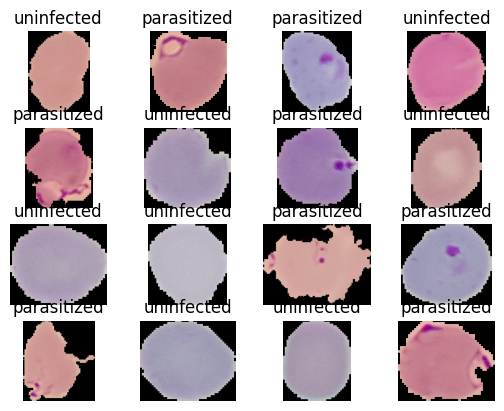

In [42]:
for i, (img, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4, 4, i + 1)
    imshow = plt.imshow(img)
    plt.axis('off')
    plt.title(ds_info.features['label'].int2str(label))

Text(0.5, 1.0, 'parasitized')

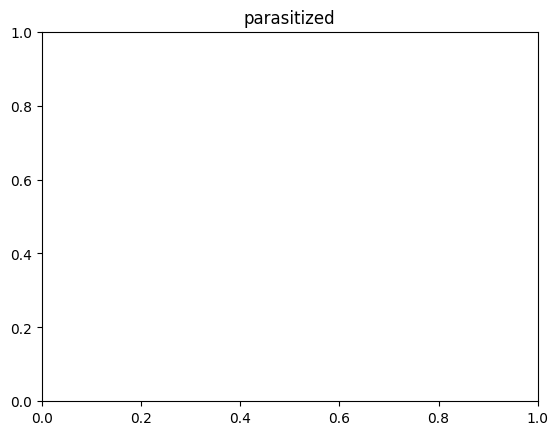

In [43]:
plt.title(ds_info.features['label'].int2str(0))

## Data Preprocessing
- resize the image
- normalize the image
    - we have two techniques
        - Standarization x=(x-Mu)/standard deviation
        - Normalization  z=(x-xmin)/(xmax-xmin)
                - we choose normalization

In [44]:
im_Size=224
def resizing(image,label):
    return tf.image.resize(image,[im_Size,im_Size]),label

In [45]:
train_dataset=train_dataset.map(resizing)
val_dataset=val_dataset.map(resizing)
test_dataset=test_dataset.map(resizing)
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [46]:
for img,label in train_dataset.take(16):
    print(img,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [47]:
##  Scalling
im_Size=224
def resize_rescale(image,label):
    return tf.image.resize(image,[im_Size,im_Size])/255,label

In [48]:
train_dataset=train_dataset.map(resize_rescale)

In [49]:
for  img,label in train_dataset.take(16):
    print(img,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [50]:
BATCH_SIZE=32
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [51]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [52]:
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [53]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

##  How and why convnets work?
Convolutional Neural Networks (CNNs) are a type of deep learning model that has following components
- inputs
- filters/kernel
- padding
- strides

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(im_Size, im_Size, 3)),

    tf.keras.layers.Conv2D(filters=6, kernel_size=3,
                           strides=1, padding="valid", activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),  # Added comma

    tf.keras.layers.Conv2D(filters=6, kernel_size=3,
                           strides=1, padding="valid", activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),  # Added pooling layer

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(100, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(10, activation='relu'),
    BatchNormalization(),
    # Changed to 'softmax' for better classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 6)    │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 17496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │     1,749,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,751,707 (6.68 MB)

 Trainable params: 1,751,463 (6.68 MB)

 Non-trainable params: 244 (976.00 B)

## Binary cross entropy loss

In [55]:
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,1]
bce=tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=5.086357593536377>

In [56]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_dataset, epochs=100, verbose=1)

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 189s 359ms/step - accuracy: 0.6557 - loss: 0.6277
Epoch 2/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 188s 363ms/step - accuracy: 0.6886 - loss: 0.5928
Epoch 3/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 201s 388ms/step - accuracy: 0.6941 - loss: 0.5812
Epoch 4/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 194s 375ms/step - accuracy: 0.6972 - loss: 0.5759
Epoch 5/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 182s 352ms/step - accuracy: 0.7150 - loss: 0.5529
Epoch 6/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 203s 393ms/step - accuracy: 0.7333 - loss: 0.5315
Epoch 7/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 188s 363ms/step - accuracy: 0.7537 - loss: 0.5005
Epoch 8/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 179s 346ms/step - accuracy: 0.7792 - loss: 0.4655
Epoch 9/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 178s 345ms/step - accuracy: 0.8095 - loss: 0.4148
Epoch 10/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 250s 484ms/step - accuracy: 0.8178 - loss: 0.3976
Epoch 11/100
 50/517 ━━━━━━━━━━━━━━━━━━━━ 4:50 623ms/step - accuracy: 0.8415 - loss: 0.35

In [ ]:
plt.plot(history.history(['accuracy']))
plt.plot(history.history(['val_accuracy']))
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Model Evalution & Testing

In [ ]:
test_dataset=test_dataset.batch(1)

In [ ]:
model.evaluate(test_dataset)

In [ ]:
model.predict(test_dataset.take(1)[0][0])

In [ ]:
model.predict(test_dataset.take(9)[0][0])

In [ ]:
def parasite_or_not(x):
    if x<0.5:
        return "parasite"
    else:
        return "not parasite"

In [ ]:
parasite_or_not(model.predict(test_dataset.take(23)[0][0]))

In [ ]:
for i, (image, label) in enumerate(test_dataset,take(9)):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title(str(parasite_or_not(label.numpy()[0]))+":"+str(parasite_or_not(model.predict(test_dataset.take(image)[0][0]))))
    plt.axis('off')

# Corrective measures
- Reduce overfitting
- Existing Model
- Visulization
- Learning rate scheduling
- callbacks and checkpoints
- Transfer Learning & finetuning
- Ensemble methods
- Tensorboard
  - Hyperparameter tuning
  - smaller network
  - early stopping
  - Regularization
  - Dropout
  - Collect More Data
  - Data augmentation

### How to load & save model